In [106]:
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Grayscaling Image

In [107]:
# Open the image
image = Image.open("input-imgs/hot-dog.png")

# Convert the image to a NumPy array
image_array = np.array(image)

# Print the array
black_white_image_array = []

for i in range(len(image_array)):
    line_image_array = []
    
    for j in range(len(image_array[i])):
        pixel_image_array = []
        pxl_avg = round(np.mean(image_array[i][j]))
        pixel_image_array.append(pxl_avg)
        line_image_array.append(pixel_image_array)
        pixel_image_array = []
        
    black_white_image_array.append(line_image_array)
    
black_white_image_array = np.array(black_white_image_array, dtype='uint8')

# Remove singleton dimensions to get shape (height, width)
black_white_image_array = np.squeeze(black_white_image_array)

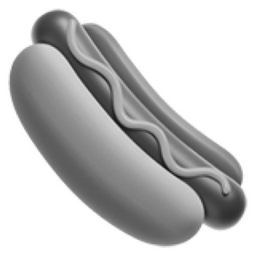

Resolution: 256x256


In [108]:
# Convert the edited array back to an image
edited_image = Image.fromarray(black_white_image_array)

# Shows the image
display(edited_image)
width, height = show_img.size

print(f"Resolution: {width}x{height}")

# Changing Resolution

In [109]:
# Open the image
gscale_image = edited_image

# Convert the image to a NumPy array
gscale_image_array = np.array(gscale_image)

In [110]:
# Function to perform the averaging operation
def average_cells(arr):
    # Removing pixels to ensure that both resolution values are even
    if(len(arr) % 2 != 0):
        arr= np.delete(arr, 0, axis=0)

    if(len(arr[0]) % 2 != 0):
        # Checking and adjusting horizontal resolution
        # Removing the first column
        arr = arr[:, 1:]
    
    n, m = arr.shape[0] // 2, arr.shape[1] // 2
    return arr.reshape(n, 2, m, 2).mean(axis=(1, 3)).astype(int)

64
64


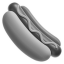

In [111]:
x = 1001
y = 1001
while x > 100 and y > 100:
    gscale_image_array = average_cells(gscale_image_array)
    
    x = len(gscale_image_array[0])
    y = len(gscale_image_array)
    
print(x)
print(y)

gscale_dscale_image_array = Image.fromarray(gscale_image_array.astype('uint8'))
# Shows the image
display(gscale_dscale_image_array)

# Encoding to ascii

In [112]:
gscale_dscale_image_array = np.array(gscale_dscale_image_array)

Histogram values: [  33  152  324  350  400  323  261  165   39 2049]
Bin edges: [ 36.   57.9  79.8 101.7 123.6 145.5 167.4 189.3 211.2 233.1 255. ]


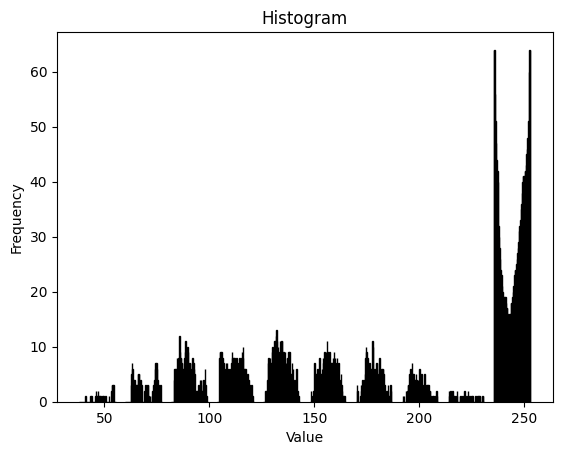

In [113]:
# Compute the histogram
hist, bin_edges = np.histogram(gscale_dscale_image_array, bins=10)

# Print the histogram values
print("Histogram values:", hist)

# Print the bin edges
print("Bin edges:", bin_edges)

# Optionally, plot the histogram
plt.hist(gscale_dscale_image_array, bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [114]:
# Compute the histogram with 10 bins
hist, bin_edges = np.histogram(gscale_dscale_image_array, bins=13)

# Print the bin edges
#print("Bin edges:", bin_edges)
# Insert the new element at the beginning of the array
#bin_edges = np.insert(bin_edges, 0, 0)

# Converting the string to a list
# FULL_ASCII_CHARS = ['$', '@', 'B', '%', '8', '&', 'W', 'M', '#', '*', 'o', 'a', 'h', 'k', 'b', 'd', 'p', 'q', 'w', 'm', 'Z', 'O', '0', 'Q', 'L', 'C', 'J', 'U', 'Y', 'X', 'z', 'c', 'v', 'u', 'n', 'x', 'r', 'j', 'f', 't', '/', '\\', '|', '(', ')', '1', '{', '}', '[', ']', '?', '-', '_', '+', '~', '<', '>', 'i', '!', 'l', 'I', ';', ':', ',', '^', '`', "'", '.']
FULL_ASCII_CHARS = ["@", "#", "$", 'B', "%", "?", "*", "+", ';', ":", ",", ".", " "]
print(bin_edges)
print(len(FULL_ASCII_CHARS))

ascii_image = []

for i in range(len(gscale_dscale_image_array)):
    ascii_image_line = []
    for j in range(len(gscale_dscale_image_array[i])):
        for k in range(len(bin_edges)-1):
            if(gscale_dscale_image_array[i][j] == bin_edges[k+1]):
                ascii_image_line.append(FULL_ASCII_CHARS[k])
                
            elif(gscale_dscale_image_array[i][j] > bin_edges[k] and gscale_dscale_image_array[i][j] < bin_edges[k+1]):
                ascii_image_line.append(FULL_ASCII_CHARS[k])
    
    x_difference = x - len(ascii_image_line)
    for l in range(x_difference):
        ascii_image_line.append(" ")
    
    ascii_image.append(ascii_image_line)
    ascii_image_line = []

#print(ascii_image)
print(ascii_image)


[ 36.          52.84615385  69.69230769  86.53846154 103.38461538
 120.23076923 137.07692308 153.92307692 170.76923077 187.61538462
 204.46153846 221.30769231 238.15384615 255.        ]
13
[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '.', ':', ';', ':', '.', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 

In [115]:
# Iterate through the rows in ascii_image
for row in ascii_image:
    # Convert the elements to strings and join them without spaces
    line_of_text = "".join(map(str, row))
    # Print each line
    print(line_of_text)

                                                                
                                                                
            .:;:.                                               
          .*BBB%%;                                              
         ,%$$B%*??;                                             
        .%$#$B?+;+:;  .                                         
        +$##$$%*++:*;?*+;.                                      
        ?$###$$%*;;?*%B?**:                                     
       .?#####$B?+;??+BB?**;                                    
       .?$#$$$$$%+;+?**BB?**:                                   
        +B###$$$B+;+*?+%B%?+*,                                  
       :;;::+B##$?;;+??+BB%?++.                                 
     ,+++;::,:?##B+;++??*BB%*+;                                 
    ,***++;:::,?##?+;;*?*?B%?++,                                
   .*??*++;;::,,%##?+;;*?+%B%?++.                               
   ;%??**++;;::,:$##?+;;;

In [116]:
# define number for the message.txt file

folder_path = 'output-msgs'

num_of_files = len(os.listdir(folder_path))

message_filename = "message-" + str(num_of_files)

message_filepath = os.path.join(folder_path, message_filename)

with open(message_filepath, 'w') as file:
    # Iterate through the rows in ascii_image
    for row in ascii_image:
        # Convert the elements to strings and join them without spaces
        line_of_text = "".join(map(str, row))
        # Print each line
        file.write(line_of_text + '\n')

# Decoding Ascii

## Import Message File

In [117]:
ascii_image = []

folder_path = 'input-msgs'

message_filename = 'message-2'

message_filepath = os.path.join(folder_path, message_filename)

# Open the file in read mode
with open(message_filepath, 'r') as file:
    for line in file:
        # Convert each character of the line into a list and append to ascii_image
        ascii_image.append(list(line.replace('\n', '')))

print(ascii_image)

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ';', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '*', '@', ';', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ';', '@', '#', '?', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' 

## Creating Value Dictionary

In [118]:
# List used to determine relative position of sublist items
FULL_ASCII_CHARS = ['@', '#', '$', 'B', '%', '?', '8', '&', 'W', 'M', '*', 'o', 'a', 'h', 'k', 'b', 'd', 'p', 'q', 'w', 'm', 'Z', 'O', '0', 'Q', 'L', 'C', 'J', 'U', 'Y', 'X', 'z', 'c', 'v', 'u', 'n', 'x', 'r', 'j', 'f', 't', '/', '\\', '|', '(', ')', '1', '{', '}', '[', ']', '-', '_', '+', '~', '<', '>', 'i', '!', 'l', 'I', ';', ':', ',', '^', '`', "'", '.', ' ']

# Finds all the unique characters in the image
unique_list = []
for row in range(len(ascii_image)):
    for cell in range(len(ascii_image[row])):
        if(ascii_image[row][cell] not in unique_list):
            unique_list.append(ascii_image[row][cell])
print(unique_list)

# Sorts the list of ascii characters relative to the FULL_ASCII_CHARS list
sorted_unique_list = sorted(unique_list, key=FULL_ASCII_CHARS.index)
print(sorted_unique_list)

# Generates the Step Value
sorted_list_length = len(sorted_unique_list)
color_distance = 255 / sorted_list_length
color_distance = math.floor(color_distance)

# Outputs the final dictionary
sorted_list_dictionary = {item: int(index * color_distance) for index, item in enumerate(sorted_unique_list)}
print(sorted_list_dictionary)

[' ', ';', '*', '@', '#', '?', '.', '$', '+', ',', '%', 'B', ':']
['@', '#', '$', 'B', '%', '?', '*', '+', ';', ':', ',', '.', ' ']
{'@': 0, '#': 19, '$': 38, 'B': 57, '%': 76, '?': 95, '*': 114, '+': 133, ';': 152, ':': 171, ',': 190, '.': 209, ' ': 228}


In [119]:
PART_ASCII_DICT = sorted_list_dictionary
print(PART_ASCII_DICT)

{'@': 0, '#': 19, '$': 38, 'B': 57, '%': 76, '?': 95, '*': 114, '+': 133, ';': 152, ':': 171, ',': 190, '.': 209, ' ': 228}


## Generating Image

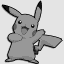

In [120]:
low_res_bw_decode_array = []
for row in range(len(ascii_image)):
    current_row = []
    for cell in range(len(ascii_image[row])):
        current_row.append(sorted_list_dictionary[ascii_image[row][cell]])
    
    low_res_bw_decode_array.append(current_row)
    
#print(low_res_bw_decode_array)

low_res_bw_decode_numpy = np.array(low_res_bw_decode_array)

low_res_bw_decode_image = Image.fromarray(low_res_bw_decode_numpy.astype('uint8'))
# Shows the image
display(low_res_bw_decode_image)



In [122]:
output_folder_path = 'output-imgs'

num_of_files = len(os.listdir(output_folder_path))

image_filename = "img-" + str(num_of_files) + ".png"

image_filepath = os.path.join(output_folder_path, image_filename)

low_res_bw_decode_image.save(image_filepath)